<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Project Title: Diabetes Prediction  | EDA and Model</p></b></h1>

### Tabel of Contents:

* [Introduction](#0)
* [Import Libraries](#1)
* [Load Dataset](#2)
* [EDA](#3)
* [Preprocessing](#4)
* [ML Models](#5)
* [Like this? Upvote and comment! 🌊 End](#6)

<a id="0"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Introduction</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

<center><span style="font-family:Palatino; font-size:22px;"><i> Did you know that managing <span style="color:#DC143C;">diabetes effectively</span> can reduce the risk of complications by up to 50%?</i></span> </center>

<div style="text-align: center;">
    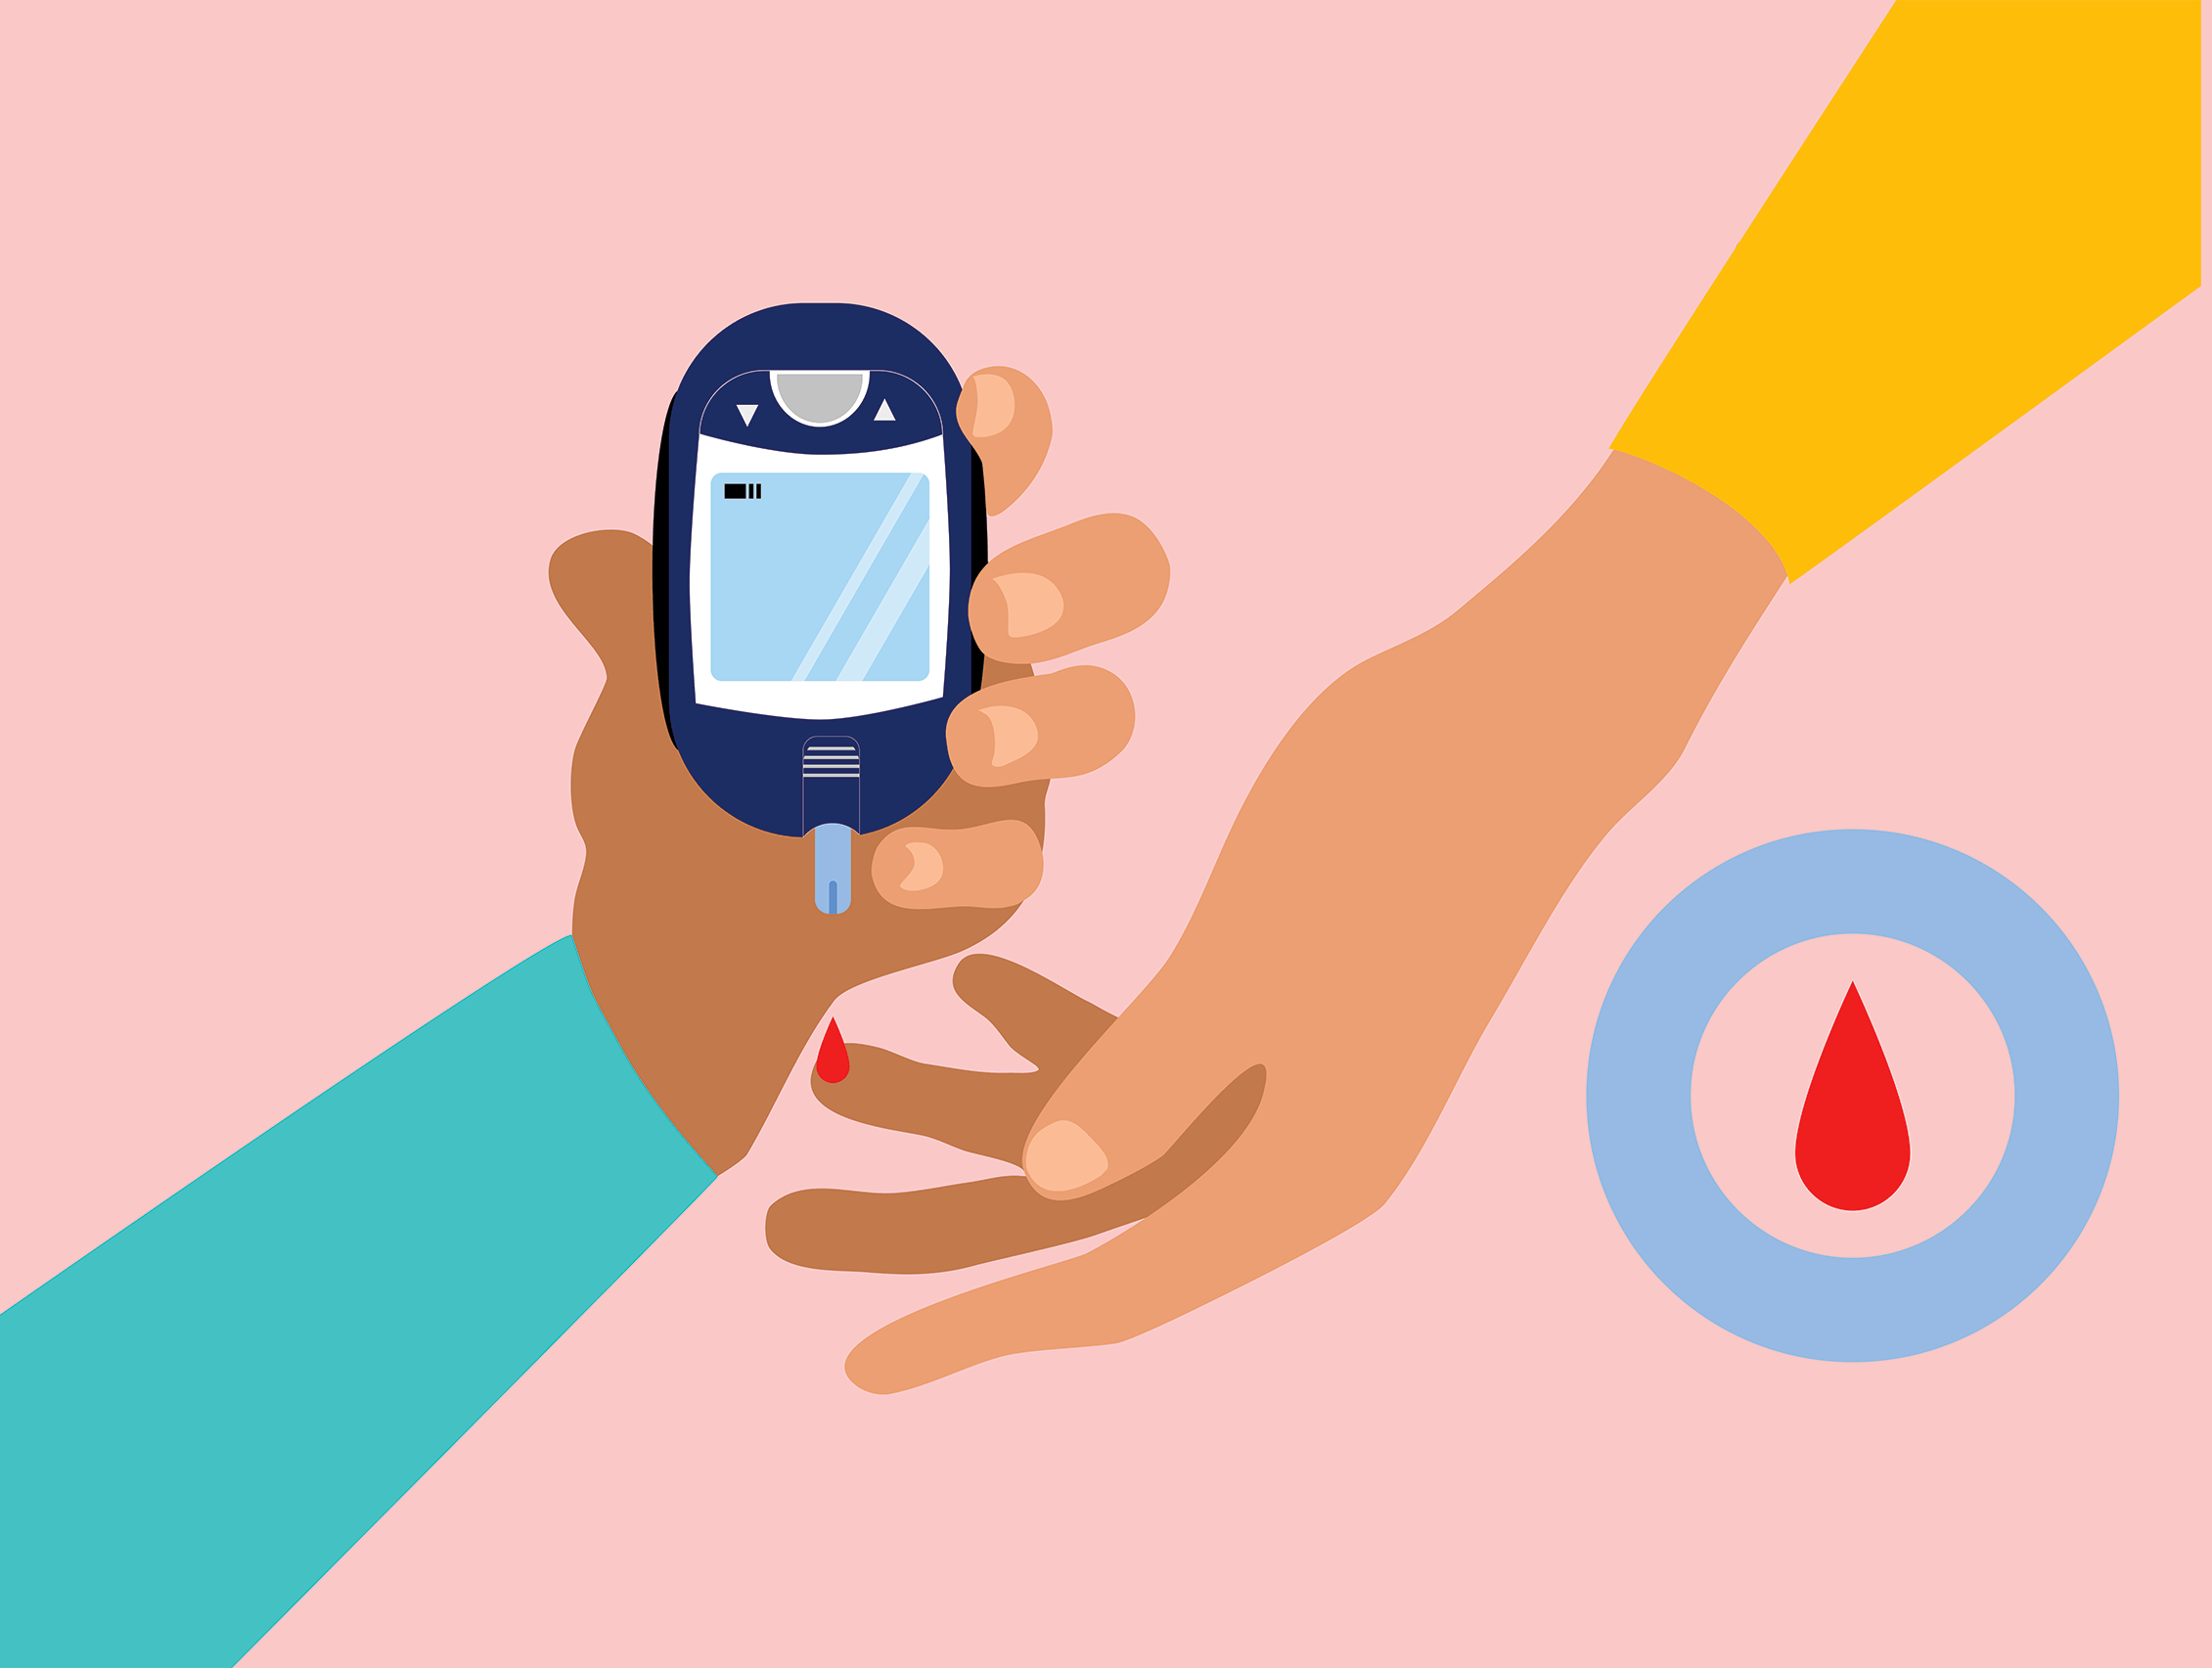
</div>


**Diabetes** is a chronic health condition that affects millions of people worldwide. Early detection of diabetes is critical for preventing complications and ensuring effective management. Machine learning, with its ability to analyze vast amounts of data and identify patterns, offers a powerful solution for predicting the likelihood of diabetes in individuals based on health-related data.

In this project, we aim to develop a predictive model that can assess a patient's risk of developing diabetes. Using the **Pima Indians Diabetes Database**, we will analyze key health indicators such as age, BMI, blood pressure, glucose levels, and family medical history. By leveraging various machine learning algorithms, including logistic regression, decision trees, random forests, and support vector machines, we will create a model that predicts whether a patient is likely to develop diabetes.

The goal of this project is not only to achieve high prediction accuracy but also to demonstrate how machine learning techniques can assist in healthcare by providing early risk assessments, which could lead to timely interventions and improved patient outcomes.

<a id="1"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Import Libraries</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [1]:
# Manipulation and Visualasation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
# Libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, f1_score, precision_score, recall_score,roc_curve, roc_auc_score
from imblearn.combine import SMOTEENN


# Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
# ignore warning
import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Load Dataset</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [2]:
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
### Shape of Dataset
print(f"The dataset has {data.shape[0]} Rows and {data.shape[1]} columns")

The dataset has 768 Rows and 9 columns


In [4]:
### Info of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
### Descriptive Analysis
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
### Missing Values
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
### Duplicated Values
data[data.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


<a id="3"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">EDA</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [8]:
### Pregnancies Distrbution
data.Pregnancies.value_counts().to_frame()

,count
Pregnancies,
1,135
0,111
2,103
3,75
4,68
5,57
6,50
7,45
8,38


In [9]:
### Pregnancies VS Outcome
data.groupby(['Outcome','Pregnancies'])['Pregnancies'].count()

Outcome  Pregnancies
0        0               73
         1              106
         2               84
         3               48
         4               45
         5               36
         6               34
         7               20
         8               16
         9               10
         10              14
         11               4
         12               5
         13               5
1        0               38
         1               29
         2               19
         3               27
         4               23
         5               21
         6               16
         7               25
         8               22
         9               18
         10              10
         11               7
         12               4
         13               5
         14               2
         15               1
         17               1
Name: Pregnancies, dtype: int64

In [10]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(
    px.histogram(data, x='Pregnancies', color_discrete_sequence=px.colors.sequential.Bluered_r,text_auto=True).data[0],
    row=1, col=1
)
fig.add_trace(
     px.box(data, y='Pregnancies',color_discrete_sequence=px.colors.sequential.BuPu_r).data[0],  
     row=1, col=2
)
fig.update_layout(
    title="Pregnancies Analysis",
    title_x=0.5,
    title_font=dict(size=20, color='rosybrown'),
    template="plotly_dark",
    width=1000, 
    height=500
)
fig.add_annotation(text="Pregnancies Distribution",
                   font=dict(size=16, color='deeppink'),
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=0.23, y=1,  
                   xanchor='center', yanchor='bottom')

fig.add_annotation(text="Pregnancies Box Plot",
                   font=dict(size=16, color='violet'),
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=.77, y=1, 
                   xanchor='center', yanchor='bottom')
fig.add_annotation(
    text="Pregnancies",
    showarrow=False,
    font=dict(size=20, color="purple"),
    xref="paper", yref="paper",
    x=.85, y=0.5
)
fig.show()

In [11]:
pregnancies_summary = data.groupby(['Pregnancies', 'Outcome']).size().reset_index(name='Count')
pregnancies_summary['Outcome'] = pregnancies_summary['Outcome'].replace(0, 'No').replace(1, 'Yes')
fig = px.bar(pregnancies_summary, 
             x='Pregnancies', 
             y='Count', 
             color='Outcome', 
             title='Pregnancies VS Target',
             text='Count',
             color_discrete_sequence=px.colors.sequential.Sunset_r)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='dodgerblue'), 
    template='plotly_dark',
    barmode='stack',  
    xaxis_title='Pregnancies',
    yaxis_title='Count',
    width=500,
    height=500,
    showlegend=True,
)
fig.show()

In [12]:
### Glucose Distrbution
min_glucose = data['Glucose'].min()
max_glucose = data['Glucose'].max()
# Print the results
print(f"Minimum Glucose: {min_glucose}")
print(f"Maximum Glucose: {max_glucose}")

Minimum Glucose: 0
Maximum Glucose: 199


In [13]:
### Average Glucose VS Traget
pivot = pd.pivot_table(data, values="Glucose", index="Outcome", aggfunc='mean')
pivot

,Glucose
Outcome,
0,109.980000
1,141.257463


In [14]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(
    px.histogram(data, x='Glucose', color_discrete_sequence=px.colors.sequential.Agsunset,text_auto=True).data[0],
    row=1, col=1
)
fig.add_trace(
     px.box(data, y='Glucose',color_discrete_sequence=px.colors.sequential.Cividis).data[0],  
     row=1, col=2
)
fig.update_layout(
    title="Glucose Analysis",
    title_x=0.5,
    title_font=dict(size=20, color='mediumaquamarine'),
    template="plotly_dark",
    width=1000, 
    height=500
)
fig.add_annotation(text="Glucose Distribution",
                   font=dict(size=16, color='mediumpurple'),
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=0.23, y=1,  
                   xanchor='center', yanchor='bottom')

fig.add_annotation(text="Glucose Box Plot",
                   font=dict(size=16, color='khaki'),
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=.77, y=1, 
                   xanchor='center', yanchor='bottom')
fig.add_annotation(
    text="Glucose",
    showarrow=False,
    font=dict(size=20, color="khaki"),
    xref="paper", yref="paper",
    x=.82, y=0.6
)
fig.show()

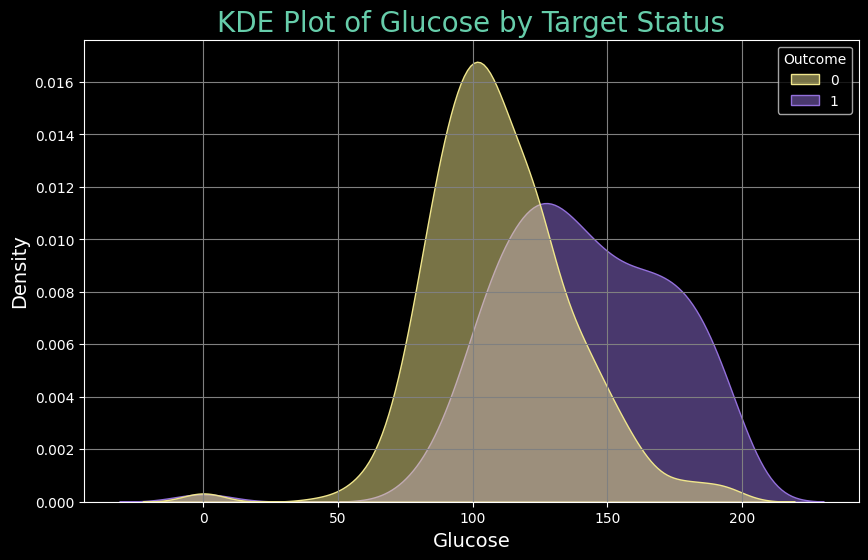

In [15]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Glucose', hue='Outcome', 
             fill=True, common_norm=False,
             palette={1: 'mediumpurple', 0: 'khaki'},
             alpha=0.5)
plt.title('KDE Plot of Glucose by Target Status', fontsize=20, color='mediumaquamarine')
plt.xlabel('Glucose', fontsize=14, color='white')
plt.ylabel('Density', fontsize=14, color='white')
plt.grid(True, color='gray')
plt.show()

In [16]:
### BloodPressure Distrbution
min_blood = data['BloodPressure'].min()
max_blood = data['BloodPressure'].max()
# Print the results
print(f"Minimum BloodPressure: {min_blood}")
print(f"Maximum BloodPressure: {max_blood}")

Minimum BloodPressure: 0
Maximum BloodPressure: 122


In [17]:
### Average BloodPressure VS Traget
pivot = pd.pivot_table(data, values="BloodPressure", index="Outcome", aggfunc='mean')
pivot

,BloodPressure
Outcome,
0,68.184000
1,70.824627


In [18]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(
    px.histogram(data, x='BloodPressure', color_discrete_sequence=px.colors.sequential.Plasma,text_auto=True).data[0],
    row=1, col=1
)
fig.add_trace(
     px.box(data, y='BloodPressure',color_discrete_sequence=px.colors.sequential.Peach_r).data[0],  
     row=1, col=2
)
fig.update_layout(
    title="BloodPressure Analysis",
    title_x=0.5,
    title_font=dict(size=20, color='crimson'),
    template="plotly_dark",
    width=1000, 
    height=500
)
fig.add_annotation(text="BloodPressure Distribution",
                   font=dict(size=16, color='dodgerblue'),
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=0.23, y=1,  
                   xanchor='center', yanchor='bottom')

fig.add_annotation(text="BloodPressure Box Plot",
                   font=dict(size=16, color='chocolate'),
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=.77, y=1, 
                   xanchor='center', yanchor='bottom')
fig.add_annotation(
    text="BloodPressure",
    showarrow=False,
    font=dict(size=20, color="chocolate"),
    xref="paper", yref="paper",
    x=.85, y=0.6
)
fig.show()

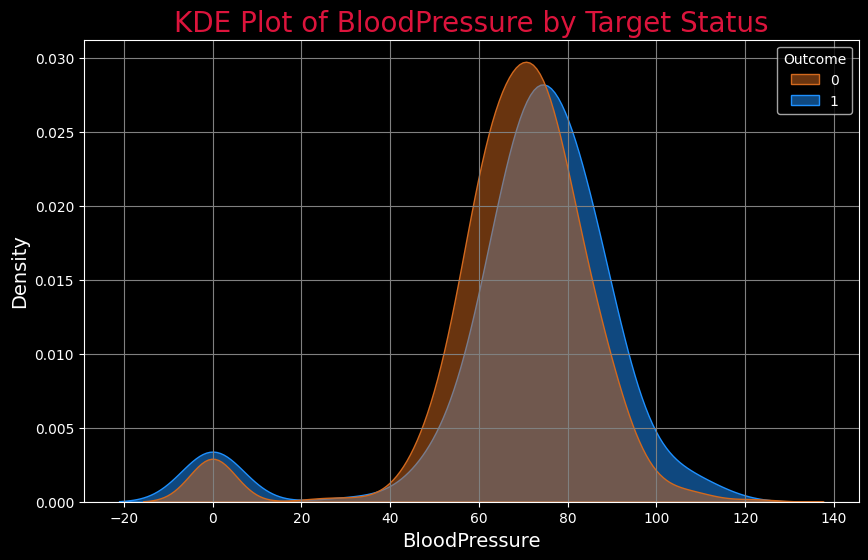

In [19]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='BloodPressure', hue='Outcome', 
             fill=True, common_norm=False,
             palette={1: 'dodgerblue', 0: 'chocolate'},
             alpha=0.5)
plt.title('KDE Plot of BloodPressure by Target Status', fontsize=20, color='crimson')
plt.xlabel('BloodPressure', fontsize=14, color='white')
plt.ylabel('Density', fontsize=14, color='white')
plt.grid(True, color='gray')
plt.show()

In [20]:
### SkinThickness Distrbution
min_skin = data['SkinThickness'].min()
max_skin = data['SkinThickness'].max()
# Print the results
print(f"Minimum SkinThickness: {min_skin}")
print(f"Maximum SkinThickness: {max_skin}")

Minimum SkinThickness: 0
Maximum SkinThickness: 99


In [21]:
### Average SkinThickness VS Traget
pivot = pd.pivot_table(data, values="SkinThickness", index="Outcome", aggfunc='mean')
pivot

,SkinThickness
Outcome,
0,19.664000
1,22.164179


In [22]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(
    px.histogram(data, x='SkinThickness', color_discrete_sequence=px.colors.sequential.Inferno_r,text_auto=True).data[0],
    row=1, col=1
)
fig.add_trace(
     px.box(data, y='SkinThickness',color_discrete_sequence=px.colors.sequential.Oryel_r).data[0],  
     row=1, col=2
)
fig.update_layout(
    title="SkinThickness Analysis",
    title_x=0.5,
    title_font=dict(size=20, color='aquamarine'),
    template="plotly_dark",
    width=1000, 
    height=500
)
fig.add_annotation(text="SkinThickness Distribution",
                   font=dict(size=16, color='blanchedalmond'),
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=0.23, y=1,  
                   xanchor='center', yanchor='bottom')

fig.add_annotation(text="SkinThickness Box Plot",
                   font=dict(size=16, color='mediumvioletred'),
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=.77, y=1, 
                   xanchor='center', yanchor='bottom')
fig.add_annotation(
    text="SkinThickness",
    showarrow=False,
    font=dict(size=20, color="mediumvioletred"),
    xref="paper", yref="paper",
    x=.85, y=0.25
)
fig.show()

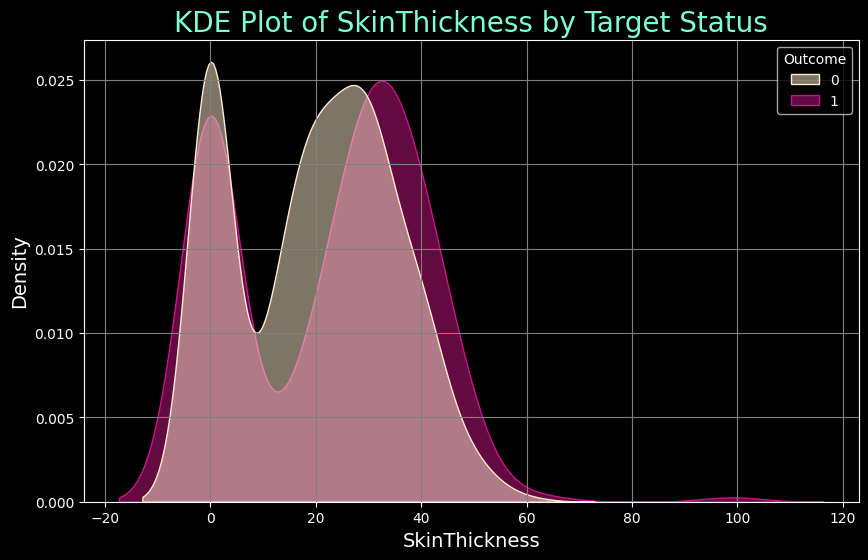

In [23]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='SkinThickness', hue='Outcome', 
             fill=True, common_norm=False,
             palette={1: 'mediumvioletred', 0: 'blanchedalmond'},
             alpha=0.5)
plt.title('KDE Plot of SkinThickness by Target Status', fontsize=20, color='aquamarine')
plt.xlabel('SkinThickness', fontsize=14, color='white')
plt.ylabel('Density', fontsize=14, color='white')
plt.grid(True, color='gray')
plt.show()

In [24]:
### Insulin Distrbution
min_insulin = data['Insulin'].min()
max_insulin = data['Insulin'].max()
# Print the results
print(f"Minimum Insulin: {min_insulin}")
print(f"Maximum Insulin: {max_insulin}")

Minimum Insulin: 0
Maximum Insulin: 846


In [25]:
### Average Insulin VS Traget
pivot = pd.pivot_table(data, values="Insulin", index="Outcome", aggfunc='mean')
pivot

,Insulin
Outcome,
0,68.792000
1,100.335821


In [26]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(
    px.histogram(data, x='Insulin', color_discrete_sequence=px.colors.sequential.Magenta,text_auto=True).data[0],
    row=1, col=1
)
fig.add_trace(
     px.box(data, y='Insulin',color_discrete_sequence=px.colors.sequential.Magenta_r).data[0],  
     row=1, col=2
)
fig.update_layout(
    title="Insulin Analysis",
    title_x=0.5,
    title_font=dict(size=20, color='aquamarine'),
    template="plotly_dark",
    width=1000, 
    height=500
)
fig.add_annotation(text="Insulin Distribution",
                   font=dict(size=16, color='blanchedalmond'),
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=0.23, y=1,  
                   xanchor='center', yanchor='bottom')

fig.add_annotation(text="Insulin Box Plot",
                   font=dict(size=16, color='mediumvioletred'),
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=.77, y=1, 
                   xanchor='center', yanchor='bottom')
fig.add_annotation(
    text="Insulin",
    showarrow=False,
    font=dict(size=20, color="mediumvioletred"),
    xref="paper", yref="paper",
    x=.82, y=0.08
)
fig.show()

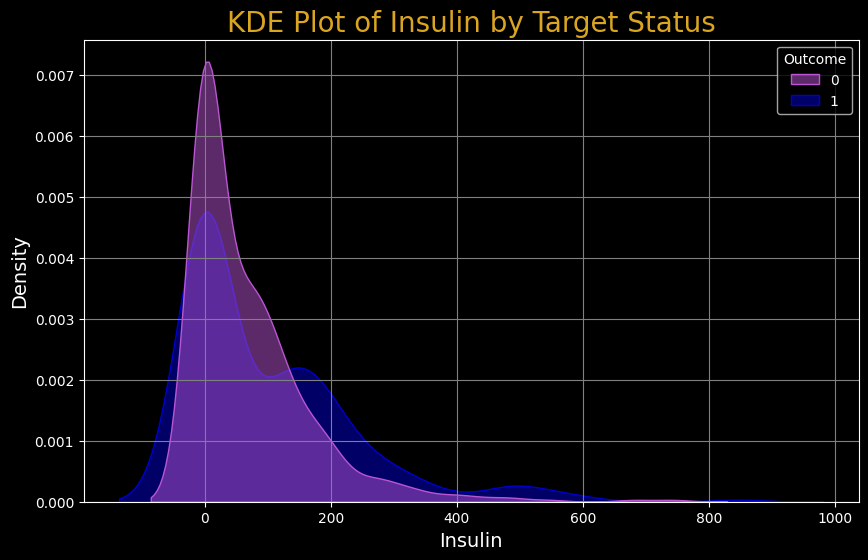

In [27]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Insulin', hue='Outcome', 
             fill=True, common_norm=False,
             palette={1: 'mediumblue', 0: 'mediumorchid'},
             alpha=0.5)
plt.title('KDE Plot of Insulin by Target Status', fontsize=20, color='goldenrod')
plt.xlabel('Insulin', fontsize=14, color='white')
plt.ylabel('Density', fontsize=14, color='white')
plt.grid(True, color='gray')
plt.show()

In [28]:
### BMI Distrbution
min_bmi = data['BMI'].min()
max_bmi = data['BMI'].max()
# Print the results
print(f"Minimum BMI: {min_bmi}")
print(f"Maximum BMI: {max_bmi}")

Minimum BMI: 0.0
Maximum BMI: 67.1


In [29]:
### Average BMI VS Traget
pivot = pd.pivot_table(data, values="BMI", index="Outcome", aggfunc='mean')
pivot

,BMI
Outcome,
0,30.304200
1,35.142537


In [30]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(
    px.histogram(data, x='BMI', color_discrete_sequence=px.colors.sequential.algae_r,text_auto=True).data[0],
    row=1, col=1
)
fig.add_trace(
     px.box(data, y='BMI',color_discrete_sequence=px.colors.sequential.GnBu_r).data[0],  
     row=1, col=2
)
fig.update_layout(
    title="BMI Analysis",
    title_x=0.5,
    title_font=dict(size=20, color='lightpink'),
    template="plotly_dark",
    width=1000, 
    height=500
)
fig.add_annotation(text="BMI Distribution",
                   font=dict(size=16, color='forestgreen'),
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=0.23, y=1,  
                   xanchor='center', yanchor='bottom')

fig.add_annotation(text="BMI Box Plot",
                   font=dict(size=16, color='dodgerblue'),
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=.77, y=1, 
                   xanchor='center', yanchor='bottom')
fig.add_annotation(
    text="BMI",
    showarrow=False,
    font=dict(size=20, color="dodgerblue"),
    xref="paper", yref="paper",
    x=.8, y=0.5
)
fig.show()

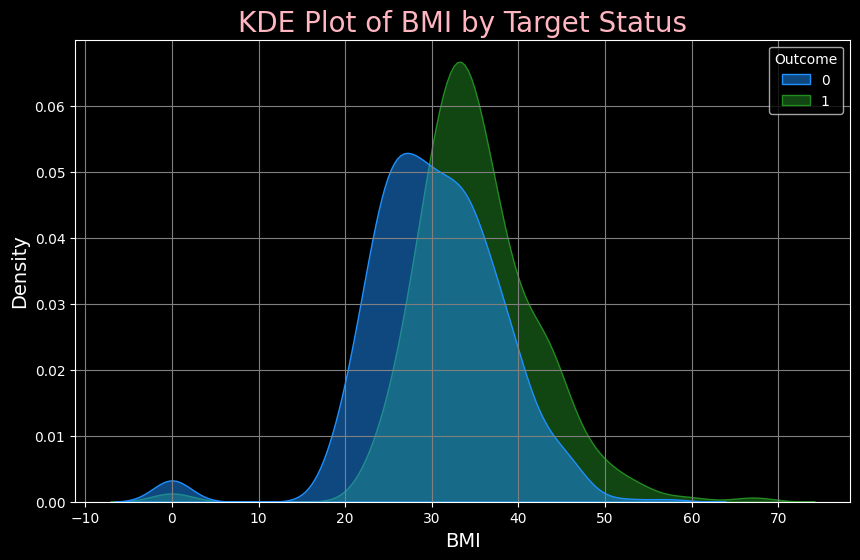

In [31]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data,x='BMI', hue='Outcome', 
             fill=True, common_norm=False,
             palette={1: 'forestgreen', 0: 'dodgerblue'},
             alpha=0.5)
plt.title('KDE Plot of BMI by Target Status', fontsize=20, color='lightpink')
plt.xlabel('BMI', fontsize=14, color='white')
plt.ylabel('Density', fontsize=14, color='white')
plt.grid(True, color='gray')
plt.show()

<div style="text-align: center;">
    <img src="https://rtaesthetics.co.uk/wp-content/uploads/2021/03/bmi-adult-fb-600x315-1.jpeg" alt="Image 1" width="500" height="300" />
</div>

In [32]:
bins = [0, 18.5, 25, 30, 35, np.inf]
names = ['Underweight', 'Normal weight', 'Overweight', 'Obese', 'Extremly Obese']
data['SegmentBMI'] = pd.cut(data['BMI'],bins, labels=names)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SegmentBMI
0,6,148,72,35,0,33.6,0.627,50,1,Obese
1,1,85,66,29,0,26.6,0.351,31,0,Overweight
2,8,183,64,0,0,23.3,0.672,32,1,Normal weight
3,1,89,66,23,94,28.1,0.167,21,0,Overweight
4,0,137,40,35,168,43.1,2.288,33,1,Extremly Obese


In [33]:
data.SegmentBMI.value_counts().to_frame()

,count
SegmentBMI,
Extremly Obese,244
Obese,221
Overweight,180
Normal weight,108
Underweight,4


In [34]:
fig = px.pie(data, title="SegmentBMI Distribution",names="SegmentBMI", color_discrete_sequence=px.colors.sequential.Bluered_r)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='red'),
    template="plotly_dark",  
    width=700,              
    height=500 
)
fig.add_annotation(
    text="SegmentBMI",
    showarrow=False,
    font=dict(size=20, color="red"), 
    xref="paper", yref="paper",
    x=0.5, y=0.5 
)
fig.show()

In [35]:
### DiabetesPedigreeFunction Distrbution
min_pedigree = data['DiabetesPedigreeFunction'].min()
max_pedigree = data['DiabetesPedigreeFunction'].max()
# Print the results
print(f"Minimum DiabetesPedigreeFunction: {min_pedigree}")
print(f"Maximum DiabetesPedigreeFunction: {max_pedigree}")

Minimum DiabetesPedigreeFunction: 0.078
Maximum DiabetesPedigreeFunction: 2.42


In [36]:
### Average DiabetesPedigreeFunction VS Traget
pivot = pd.pivot_table(data, values="DiabetesPedigreeFunction", index="Outcome", aggfunc='mean')
pivot

,DiabetesPedigreeFunction
Outcome,
0,0.429734
1,0.550500


In [37]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(
    px.histogram(data, x='DiabetesPedigreeFunction', color_discrete_sequence=px.colors.sequential.haline_r,text_auto=True).data[0],
    row=1, col=1
)
fig.add_trace(
     px.box(data, y='DiabetesPedigreeFunction',color_discrete_sequence=px.colors.sequential.haline).data[0],  
     row=1, col=2
)
fig.update_layout(
    title="DiabetesPedigreeFunction Analysis",
    title_x=0.5,
    title_font=dict(size=20, color='midnightblue'),
    template="plotly_dark",
    width=1000, 
    height=500
)
fig.add_annotation(text="DiabetesPedigreeFunction Distribution",
                   font=dict(size=16, color='sandybrown'),
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=0.23, y=1,  
                   xanchor='center', yanchor='bottom')

fig.add_annotation(text="DiabetesPedigreeFunction Box Plot",
                   font=dict(size=16, color='dodgerblue'),
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=.77, y=1, 
                   xanchor='center', yanchor='bottom')
fig.add_annotation(
    text="PedigreeFunction",
    showarrow=False,
    font=dict(size=20, color="dodgerblue"),
    xref="paper", yref="paper",
    x=.88, y=0.15
)
fig.show()

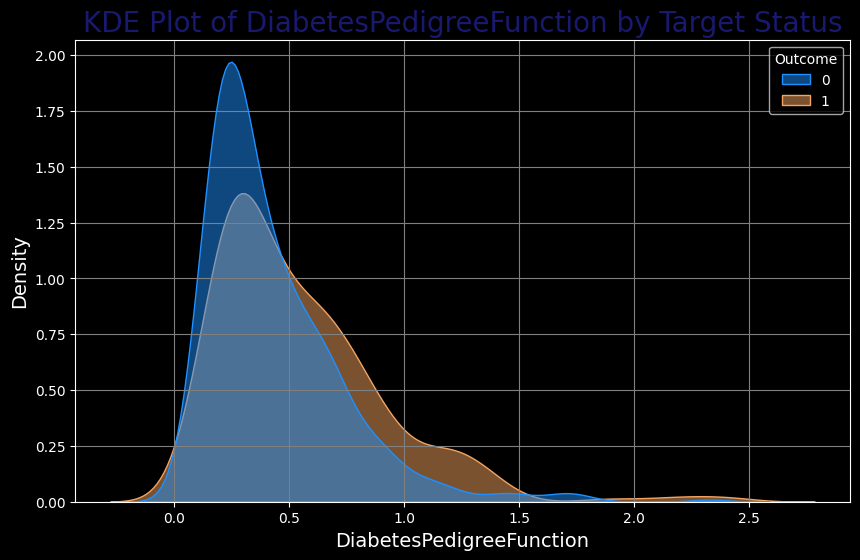

In [38]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data,x='DiabetesPedigreeFunction', hue='Outcome', 
             fill=True, common_norm=False,
             palette={1: 'sandybrown', 0: 'dodgerblue'},
             alpha=0.5)
plt.title('KDE Plot of DiabetesPedigreeFunction by Target Status', fontsize=20, color='midnightblue')
plt.xlabel('DiabetesPedigreeFunction', fontsize=14, color='white')
plt.ylabel('Density', fontsize=14, color='white')
plt.grid(True, color='gray')
plt.show()

In [39]:
### Age Distrbution
min_age = data['Age'].min()
max_age = data['Age'].max()
# Print the results
print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")

Minimum Age: 21
Maximum Age: 81


In [40]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(
    px.histogram(data, x='Age', color_discrete_sequence=px.colors.sequential.Brwnyl_r,text_auto=True).data[0],
    row=1, col=1
)
fig.add_trace(
     px.box(data, y='Age',color_discrete_sequence=px.colors.sequential.Oranges_r).data[0],  
     row=1, col=2
)
fig.update_layout(
    title="Age Analysis",
    title_x=0.5,
    title_font=dict(size=20, color='brown'),
    template="plotly_dark",
    width=1000, 
    height=500
)
fig.add_annotation(text="Age Distribution",
                   font=dict(size=16, color='darkred'),
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=0.23, y=1,  
                   xanchor='center', yanchor='bottom')

fig.add_annotation(text="Age Box Plot",
                   font=dict(size=16, color='darkorange'),
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=.77, y=1, 
                   xanchor='center', yanchor='bottom')
fig.add_annotation(
    text="Age",
    showarrow=False,
    font=dict(size=20, color="darkorange"),
    xref="paper", yref="paper",
    x=.8, y=0.2
)
fig.show()

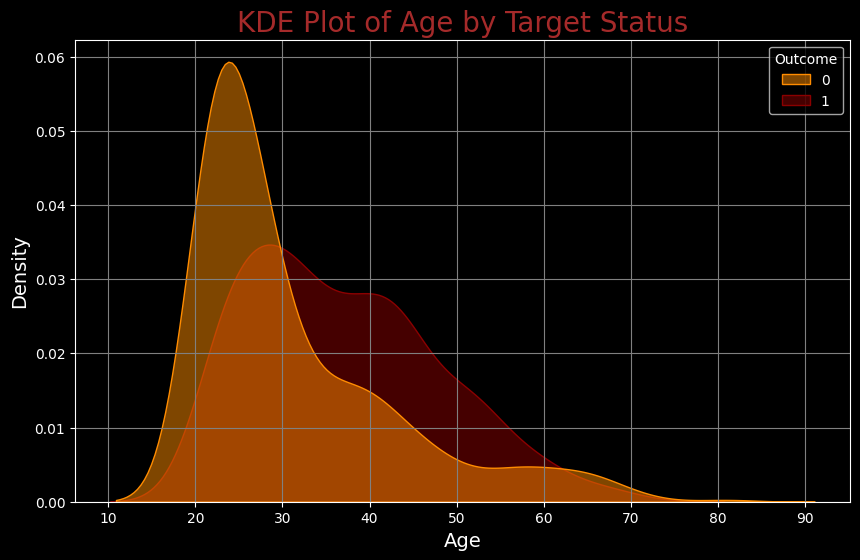

In [41]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data,x='Age', hue='Outcome', 
             fill=True, common_norm=False,
             palette={1: 'darkred', 0: 'darkorange'},
             alpha=0.5)
plt.title('KDE Plot of Age by Target Status', fontsize=20, color='brown')
plt.xlabel('Age', fontsize=14, color='white')
plt.ylabel('Density', fontsize=14, color='white')
plt.grid(True, color='gray')
plt.show()

In [42]:
### Target Distrbution
data.Outcome.value_counts().to_frame()

,count
Outcome,
0,500
1,268


In [43]:
fig = px.pie(data, title="Target Distribution",names="Outcome", color_discrete_sequence=px.colors.sequential.Aggrnyl_r)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='yellow'),
    template="plotly_dark",  
    width=700,              
    height=500 
)
fig.add_annotation(
    text="Target",
    showarrow=False,
    font=dict(size=20, color="yellow"), 
    xref="paper", yref="paper",
    x=0.5, y=0.5 
)
fig.show()

<center><span style="font-family:Palatino; font-size:22px;"><i> Graph Show  <span style="color:yellow;">Dataset</span> Imbalanced</i></span> </center>

In [44]:
columns = data.select_dtypes(include='number').columns
columns = columns[:-1]
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [45]:
fig = make_subplots(rows=2, cols=4, subplot_titles=columns)
for i, col in enumerate(columns, start=1):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + (1.5 * iqr)
    lower = q1 - (1.5 * iqr)
    data[col][data[col] > upper] = upper
    data[col][data[col] < lower] = lower
    trace = go.Box(y=data[col], name=col)
    row = (i - 1) // 4 + 1
    col = (i - 1) % 4 + 1
    fig.add_trace(trace, row=row, col=col)
fig.update_layout(title_text='Box Plot of Columns without Outliers',
                  title_x=0.5, title_y=0.95, height=800, width=1000, template='plotly_dark')
fig.show()

<a id="4"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Preprocessing</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [46]:
columns = data.select_dtypes(include=['category','object']).columns
columns

Index(['SegmentBMI'], dtype='object')

In [47]:
### Transform Object Columns into Numbers
label_encoder = LabelEncoder()
for col in columns:
    data[col] = label_encoder.fit_transform(data[col])
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SegmentBMI
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0,1,2
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0,0,3
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0,1,1
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0,0,3
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0,1,0


In [48]:
### Show Correlation
corr = data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SegmentBMI
Pregnancies,1.000000,0.128987,0.184307,-0.084349,-0.077793,0.024681,-0.017398,0.549695,0.220392,0.008419
Glucose,0.128987,1.000000,0.197865,0.059806,0.315856,0.235542,0.120213,0.269056,0.479158,-0.105842
BloodPressure,0.184307,0.197865,1.000000,0.152644,0.050080,0.282544,0.038793,0.304208,0.113301,-0.202628
SkinThickness,-0.084349,0.059806,0.152644,1.000000,0.488101,0.401494,0.177920,-0.119170,0.073125,-0.263598
Insulin,-0.077793,0.315856,0.050080,0.488101,1.000000,0.209665,0.190087,-0.065547,0.124721,-0.147771
BMI,0.024681,0.235542,0.282544,0.401494,0.209665,1.000000,0.141087,0.043375,0.309739,-0.655377
DiabetesPedigreeFunction,-0.017398,0.120213,0.038793,0.177920,0.190087,0.141087,1.000000,0.047289,0.184969,-0.072473
Age,0.549695,0.269056,0.304208,-0.119170,-0.065547,0.043375,0.047289,1.000000,0.242702,-0.024697
Outcome,0.220392,0.479158,0.113301,0.073125,0.124721,0.309739,0.184969,0.242702,1.000000,-0.122902
SegmentBMI,0.008419,-0.105842,-0.202628,-0.263598,-0.147771,-0.655377,-0.072473,-0.024697,-0.122902,1.000000


In [49]:
mask = np.triu(np.ones_like(corr, dtype=bool))
df_mask = corr.mask(mask)
df_mask_rounded = df_mask.round(2)
fig = ff.create_annotated_heatmap(z=df_mask_rounded.values, 
                                  x=df_mask_rounded.columns.tolist(),
                                  y=df_mask_rounded.columns.tolist(),
                                  colorscale='RdBu',  
                                  hoverinfo='none',  
                                  showscale=True,
                                  ygap=1,
                                  xgap=1
                                 )
fig.update_xaxes(side='bottom')
fig.update_layout(
    title_text='Heatmap', 
    title_font=dict(size=20, color='red'),
    title_x=0.5, 
    width=1000, 
    height=600,
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True, autorange='reversed'),
    template='plotly_dark'
)
for annotation in fig.layout.annotations:
    if annotation.text == 'nan':
        annotation.text = ""
fig.show()

In [50]:
target_corr = corr[['Outcome']].drop('Outcome')
target_corr

,Outcome
Pregnancies,0.220392
Glucose,0.479158
BloodPressure,0.113301
SkinThickness,0.073125
Insulin,0.124721
BMI,0.309739
DiabetesPedigreeFunction,0.184969
Age,0.242702
SegmentBMI,-0.122902


In [51]:
mask = np.triu(np.ones_like(target_corr, dtype=bool))
df_mask = target_corr.mask(mask)
df_mask_rounded = df_mask.round(2)
fig = ff.create_annotated_heatmap(
    z=df_mask_rounded.values,
    x=['Target'],
    y=df_mask_rounded.index.tolist(),
    colorscale='RdBu',
    hoverinfo='none',
    showscale=True,
    ygap=1,
    xgap=1
)
fig.update_xaxes(side='bottom')
fig.update_layout(
    title_text='Correlation with Target',
    title_font=dict(size=20, color='red'),
    title_x=0.5,
    width=1000,
    height=600,
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True, autorange='reversed'),
    template='plotly_dark'
)
for annotation in fig.layout.annotations:
    if annotation.text == 'nan':
        annotation.text = ""

fig.show()

In [52]:
### Split 
X = data.drop(['SegmentBMI','Outcome'],axis=1)
y = data['Outcome']
keys = X.columns
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0


In [53]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [54]:
### Scaling
scale = MinMaxScaler()
X = scale.fit_transform(X)
X = pd.DataFrame(X,columns=keys)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.444444,0.684942,0.513889,0.4375,0.000000,0.544355,0.489305,0.637363
1,0.074074,0.295753,0.430556,0.3625,0.000000,0.356183,0.243316,0.219780
2,0.592593,0.901158,0.402778,0.0000,0.000000,0.267473,0.529412,0.241758
3,0.074074,0.320463,0.430556,0.2875,0.295481,0.396505,0.079323,0.000000
4,0.000000,0.616988,0.069444,0.4375,0.528094,0.799731,1.000000,0.263736


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                            random_state=42, shuffle =True,stratify=y)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (614, 8)
X_test shape is  (154, 8)
y_train shape is  (614,)
y_test shape is  (154,)


In [56]:
# Apply SMOTEN to the training data
smoten = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoten.fit_resample(X, y)
# Print the shapes after applying SMOTEN
print('X_resampled shape is ', X_resampled.shape)
print('y_resampled shape is ', y_resampled.shape)

X_resampled shape is  (556, 8)
y_resampled shape is  (556,)


In [57]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled,
                                                                           test_size=0.20,random_state=42, shuffle =True,stratify=y_resampled)
print('X_train_resampled shape is ' , X_train_resampled.shape)
print('X_test_resampled shape is ' , X_test_resampled.shape)
print('y_train_resampled shape is ' , y_train_resampled.shape)
print('y_test_resampled shape is ' , y_test_resampled.shape)

X_train_resampled shape is  (444, 8)
X_test_resampled shape is  (112, 8)
y_train_resampled shape is  (444,)
y_test_resampled shape is  (112,)


<a id="5"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">ML Models</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [58]:
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(),
    'LGBM': LGBMClassifier(verbose=-1),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(probability=True,random_state=42, class_weight='balanced'),
    'LogisticRegression': LogisticRegression(random_state=42, class_weight='balanced'),
    'CatBoost': CatBoostClassifier(logging_level='Silent'),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'NaiveBayes': GaussianNB()
}
### Validation Score
cv_results = {}
for model_name, model in models.items():
    print(f"Cross-validating {model_name}...")
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,verbose=0)
    cv_results[model_name] = cv_scores.mean()
    print(f"Mean accuracy for {model_name}: {cv_scores.mean():.4f}")

Cross-validating RandomForest...
Mean accuracy for RandomForest: 0.7688
Cross-validating XGBoost...
Mean accuracy for XGBoost: 0.7264
Cross-validating LGBM...
Mean accuracy for LGBM: 0.7280
Cross-validating DecisionTree...
Mean accuracy for DecisionTree: 0.6760
Cross-validating KNN...
Mean accuracy for KNN: 0.7102
Cross-validating SVC...
Mean accuracy for SVC: 0.7558
Cross-validating LogisticRegression...
Mean accuracy for LogisticRegression: 0.7443
Cross-validating CatBoost...
Mean accuracy for CatBoost: 0.7671
Cross-validating GradientBoosting...
Mean accuracy for GradientBoosting: 0.7493
Cross-validating AdaBoost...
Mean accuracy for AdaBoost: 0.7622
Cross-validating NaiveBayes...
Mean accuracy for NaiveBayes: 0.7590


In [59]:
cv_results_df = pd.DataFrame(list(cv_results.items()), columns=['Model', 'Mean Accuracy'])
cv_results_df = cv_results_df.sort_values(by='Mean Accuracy', ascending=False)
cv_results_df

,Model,Mean Accuracy
0,RandomForest,0.768786
7,CatBoost,0.767133
9,AdaBoost,0.762202
10,NaiveBayes,0.758976
5,SVC,0.755778
8,GradientBoosting,0.749274
6,LogisticRegression,0.744329
2,LGBM,0.728029
1,XGBoost,0.726376
4,KNN,0.710169


In [60]:
best_model_name = cv_results_df.iloc[0]['Model']
print(f"\nBest model from CV: {best_model_name}")


Best model from CV: RandomForest


In [61]:
fig = px.bar(cv_results_df, x='Model', y='Mean Accuracy', title='Cross-Validation Accuracy for Different Models',text_auto=True,
             labels={'Mean Accuracy': 'Mean Accuracy'}, color='Mean Accuracy')
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='mediumorchid'),
    template="plotly_dark",  
    width=800,              
    height=600 
)
fig.show()

In [62]:
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'max_depth': [3, 5, 7, 10, 20, 30, 40],
        'n_estimators': [50, 100, 200],
        'subsample': [0.6, 0.8, 1],
        'learning_rate': [0.05, 0.1, 0.5,1]
    },
    'LGBM': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10, 20, 30, 40],
        'learning_rate': [0.05, 0.1, 0.5,1]
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'CatBoost': {
        'iterations': [100, 200],
        'learning_rate': [0.05, 0.1,.5,1],
        'depth': [6, 10, 15, 20, 25, 30, 40]
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1,.5,1],
        'max_depth': [None, 10, 20, 30, 40]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1,.5,1]
    },
    'NaiveBayes': {}
}

best_results = []
for model_name, model in models.items():
    print(f"\nPerforming GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_results.append({'Model': model_name, 'Best Score': best_score, 'Best Params': best_params})
    print(f"\nBest parameters for {model_name}: {best_params}")
    print(f"Best cross-validation score for {model_name}: {best_score:.4f}")



Performing GridSearchCV for RandomForest...

Best parameters for RandomForest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score for RandomForest: 0.7851

Performing GridSearchCV for XGBoost...

Best parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best cross-validation score for XGBoost: 0.7818

Performing GridSearchCV for LGBM...

Best parameters for LGBM: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}
Best cross-validation score for LGBM: 0.7688

Performing GridSearchCV for DecisionTree...

Best parameters for DecisionTree: {'max_depth': None, 'min_samples_split': 2}
Best cross-validation score for DecisionTree: 0.6760

Performing GridSearchCV for KNN...

Best parameters for KNN: {'n_neighbors': 7, 'weights': 'uniform'}
Best cross-validation score for KNN: 0.7395

Performing GridSearchCV for SVC...

Best parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
Best cro

In [63]:
best_results_df = pd.DataFrame(best_results)
best_results_df = best_results_df.sort_values(by='Best Score', ascending=False)
best_results_df

,Model,Best Score,Best Params
5,SVC,0.786685,"{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}"
0,RandomForest,0.785059,"{'max_depth': 10, 'min_samples_split': 2, 'n_e..."
1,XGBoost,0.781807,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est..."
7,CatBoost,0.776903,"{'depth': 6, 'iterations': 100, 'learning_rate..."
2,LGBM,0.768799,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est..."
9,AdaBoost,0.763881,"{'learning_rate': 0.1, 'n_estimators': 50}"
10,NaiveBayes,0.758976,{}
6,LogisticRegression,0.750846,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}"
4,KNN,0.739531,"{'n_neighbors': 7, 'weights': 'uniform'}"
8,GradientBoosting,0.731307,"{'learning_rate': 1, 'max_depth': 10, 'n_estim..."


In [64]:
best_model_name, best_model_param = best_results_df.iloc[0]['Model'],best_results_df.iloc[0]['Best Params']
print(f"\nBest model : {best_model_name}")
print(f"\nBest Parameters : {best_model_param}")


Best model : SVC

Best Parameters : {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}


In [65]:
fig = px.bar(best_results_df, x='Model', y='Best Score',title='Best Cross-Validation Scores for All Models',text_auto=True,
             labels={'Best Score': 'Best Cross-Validation Score'}, color='Best Score')
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='mediumorchid'),
    template="plotly_dark",  
    width=800,              
    height=600 
)
fig.show()

In [66]:
################# Best Model Train 
model = SVC(probability=True,random_state=42, class_weight='balanced',C=1,gamma='scale',kernel='poly')
model.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', kernel='poly', probability=True,
    random_state=42)

In [67]:
### Evaluate the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)  
train_recall = recall_score(y_train, y_train_pred)  
train_f1 = f1_score(y_train, y_train_pred)  
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred) 
test_recall = recall_score(y_test, y_test_pred)  
test_f1 = f1_score(y_test, y_test_pred) 
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Training Precision: {train_precision:.2f}')
print(f'Training Recall: {train_recall:.2f}')
print(f'Training F1-Score: {train_f1:.2f}')
print('---')
print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Test Precision: {test_precision:.2f}')
print(f'Test Recall: {test_recall:.2f}')
print(f'Test F1-Score: {test_f1:.2f}')

Training Accuracy: 0.84
Training Precision: 0.78
Training Recall: 0.76
Training F1-Score: 0.77
---
Test Accuracy: 0.71
Test Precision: 0.59
Test Recall: 0.59
Test F1-Score: 0.59


In [68]:
# AUC and ROC curve for test set
y_test_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)
roc_data = {
    'False Positive Rate': fpr,
    'True Positive Rate': tpr
}
fig = px.line(
    roc_data, 
    x='False Positive Rate', 
    y='True Positive Rate',
    title=f'ROC Curve (AUC = {roc_auc:.2f})',
    labels={'x': 'False Positive Rate', 'y': 'True Positive Rate'},
    width=800,
    height=600
)
fig.add_shape(
    type='line', 
    x0=0, y0=0, x1=1, y1=1,
    line=dict(color='red', dash='dash')
)
fig.update_layout(
    title_font=dict(size=20, color='mediumorchid'),
    title_x=0.5,
    xaxis=dict(showgrid=True, zeroline=True),
    yaxis=dict(showgrid=True, zeroline=True),
    template='plotly_dark'
)
fig.show()

Confusion Matrix is : 
 [[78 22]
 [22 32]]


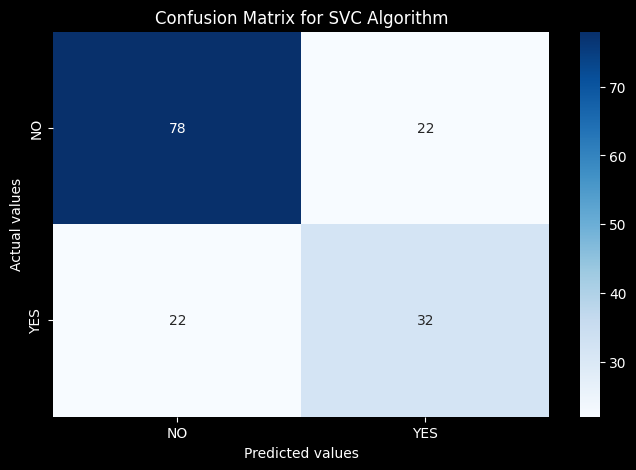

In [69]:
### Check model
CM = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix is : \n', CM)
plt.figure(figsize=(8,5))
sns.heatmap(data=CM, annot=True,fmt='g', cmap="Blues", xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title(f'Confusion Matrix for {best_model_name} Algorithm')
plt.show()

In [70]:
ClassificationReport = classification_report(y_test,y_test_pred,target_names=['NO', 'YES'])
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

          NO       0.78      0.78      0.78       100
         YES       0.59      0.59      0.59        54

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154



In [71]:
# Apply ML in SMOTEN to the training data
### Validation Score 
cv_results = {}
for model_name, model in models.items():
    print(f"Cross-validating {model_name}...")
    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy', n_jobs=-1,verbose=0)
    cv_results[model_name] = cv_scores.mean()
    print(f"Mean accuracy for {model_name}: {cv_scores.mean():.4f}")

Cross-validating RandomForest...
Mean accuracy for RandomForest: 0.9504
Cross-validating XGBoost...
Mean accuracy for XGBoost: 0.9595
Cross-validating LGBM...
Mean accuracy for LGBM: 0.9572
Cross-validating DecisionTree...
Mean accuracy for DecisionTree: 0.9121
Cross-validating KNN...
Mean accuracy for KNN: 0.9280
Cross-validating SVC...
Mean accuracy for SVC: 0.9437
Cross-validating LogisticRegression...
Mean accuracy for LogisticRegression: 0.9144
Cross-validating CatBoost...
Mean accuracy for CatBoost: 0.9572
Cross-validating GradientBoosting...
Mean accuracy for GradientBoosting: 0.9437
Cross-validating AdaBoost...
Mean accuracy for AdaBoost: 0.9257
Cross-validating NaiveBayes...
Mean accuracy for NaiveBayes: 0.8852


In [72]:
cv_results_df = pd.DataFrame(list(cv_results.items()), columns=['Model', 'Mean Accuracy'])
cv_results_df = cv_results_df.sort_values(by='Mean Accuracy', ascending=False)
cv_results_df

,Model,Mean Accuracy
1,XGBoost,0.959474
7,CatBoost,0.957201
2,LGBM,0.957201
0,RandomForest,0.950434
5,SVC,0.943693
8,GradientBoosting,0.943693
4,KNN,0.927962
9,AdaBoost,0.925664
6,LogisticRegression,0.914428
3,DecisionTree,0.912104


In [73]:
fig = px.bar(cv_results_df, x='Model', y='Mean Accuracy', title='Cross-Validation Accuracy for Different Models',text_auto=True,
             labels={'Mean Accuracy': 'Mean Accuracy'}, color='Mean Accuracy')
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='mediumorchid'),
    template="plotly_dark",  
    width=800,              
    height=600 
)
fig.show()

In [74]:
best_results = []
for model_name, model in models.items():
    print(f"\nPerforming GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    # Store the best score and parameters
    best_results.append({'Model': model_name, 'Best Score': best_score, 'Best Params': best_params})
    print(f"\nBest parameters for {model_name}: {best_params}")
    print(f"Best cross-validation score for {model_name}: {best_score:.4f}")


Performing GridSearchCV for RandomForest...

Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score for RandomForest: 0.9572

Performing GridSearchCV for XGBoost...

Best parameters for XGBoost: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1}
Best cross-validation score for XGBoost: 0.9662

Performing GridSearchCV for LGBM...

Best parameters for LGBM: {'learning_rate': 0.5, 'max_depth': None, 'n_estimators': 50}
Best cross-validation score for LGBM: 0.9640

Performing GridSearchCV for DecisionTree...

Best parameters for DecisionTree: {'max_depth': None, 'min_samples_split': 5}
Best cross-validation score for DecisionTree: 0.9122

Performing GridSearchCV for KNN...

Best parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score for KNN: 0.9459

Performing GridSearchCV for SVC...

Best parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cr

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Best parameters for LogisticRegression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score for LogisticRegression: 0.9279

Performing GridSearchCV for CatBoost...

Best parameters for CatBoost: {'depth': 15, 'iterations': 200, 'learning_rate': 0.5}
Best cross-validation score for CatBoost: 0.9684

Performing GridSearchCV for GradientBoosting...

Best parameters for GradientBoosting: {'learning_rate': 1, 'max_depth': None, 'n_estimators': 50}
Best cross-validation score for GradientBoosting: 0.9189

Performing GridSearchCV for AdaBoost...

Best parameters for AdaBoost: {'learning_rate': 0.05, 'n_estimators': 50}
Best cross-validation score for AdaBoost: 0.9460

Performing GridSearchCV for NaiveBayes...

Best parameters for NaiveBayes: {}
Best cross-validation score for NaiveBayes: 0.8852


In [75]:
best_results_df = pd.DataFrame(best_results)
best_results_df = best_results_df.sort_values(by='Best Score', ascending=False)
best_results_df

,Model,Best Score,Best Params
7,CatBoost,0.968412,"{'depth': 15, 'iterations': 200, 'learning_rat..."
1,XGBoost,0.966190,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti..."
2,LGBM,0.963968,"{'learning_rate': 0.5, 'max_depth': None, 'n_e..."
0,RandomForest,0.957176,"{'max_depth': None, 'min_samples_split': 2, 'n..."
5,SVC,0.950460,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}"
9,AdaBoost,0.945965,"{'learning_rate': 0.05, 'n_estimators': 50}"
4,KNN,0.945940,"{'n_neighbors': 3, 'weights': 'distance'}"
6,LogisticRegression,0.927911,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}"
8,GradientBoosting,0.918897,"{'learning_rate': 1, 'max_depth': None, 'n_est..."
3,DecisionTree,0.912155,"{'max_depth': None, 'min_samples_split': 5}"


In [76]:
best_model_name, best_model_param = best_results_df.iloc[0]['Model'],best_results_df.iloc[0]['Best Params']
print(f"\nBest model : {best_model_name}")
print(f"\nBest Parameters : {best_model_param}")


Best model : CatBoost

Best Parameters : {'depth': 15, 'iterations': 200, 'learning_rate': 0.5}


In [77]:
fig = px.bar(best_results_df, x='Model', y='Best Score',title='Best Cross-Validation Scores for All Models',text_auto=True,
             labels={'Best Score': 'Best Cross-Validation Score'}, color='Best Score')
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='mediumorchid'),
    template="plotly_dark",  
    width=800,              
    height=600 
)
fig.show()

In [78]:
################# Best Model Training
model = KNeighborsClassifier(n_neighbors=3,weights='distance')
model.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [79]:
### Evaluate the model
y_train_pred = model.predict(X_train_resampled)
y_test_pred = model.predict(X_test_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred)  
train_recall = recall_score(y_train_resampled, y_train_pred)  
train_f1 = f1_score(y_train_resampled, y_train_pred)  
test_accuracy = accuracy_score(y_test_resampled, y_test_pred)
test_precision = precision_score(y_test_resampled, y_test_pred) 
test_recall = recall_score(y_test_resampled, y_test_pred)  
test_f1 = f1_score(y_test_resampled, y_test_pred) 
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Training Precision: {train_precision:.2f}')
print(f'Training Recall: {train_recall:.2f}')
print(f'Training F1-Score: {train_f1:.2f}')
print('---')
print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Test Precision: {test_precision:.2f}')
print(f'Test Recall: {test_recall:.2f}')
print(f'Test F1-Score: {test_f1:.2f}')

Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00
Training F1-Score: 1.00
---
Test Accuracy: 0.98
Test Precision: 0.97
Test Recall: 1.00
Test F1-Score: 0.98


In [80]:
# AUC and ROC curve for test set
y_test_prob = model.predict_proba(X_test_resampled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_resampled, y_test_prob)
roc_auc = roc_auc_score(y_test_resampled, y_test_prob)
roc_data = {
    'False Positive Rate': fpr,
    'True Positive Rate': tpr
}
fig = px.line(
    roc_data, 
    x='False Positive Rate', 
    y='True Positive Rate',
    title=f'ROC Curve (AUC = {roc_auc:.2f})',
    labels={'x': 'False Positive Rate', 'y': 'True Positive Rate'},
    width=800,
    height=600
)
fig.add_shape(
    type='line', 
    x0=0, y0=0, x1=1, y1=1,
    line=dict(color='red', dash='dash')
)
fig.update_layout(
    title_font=dict(size=20, color='mediumorchid'),
    title_x=0.5,
    xaxis=dict(showgrid=True, zeroline=True),
    yaxis=dict(showgrid=True, zeroline=True),
    template='plotly_dark'
)
fig.show()

Confusion Matrix is : 
 [[50  2]
 [ 0 60]]


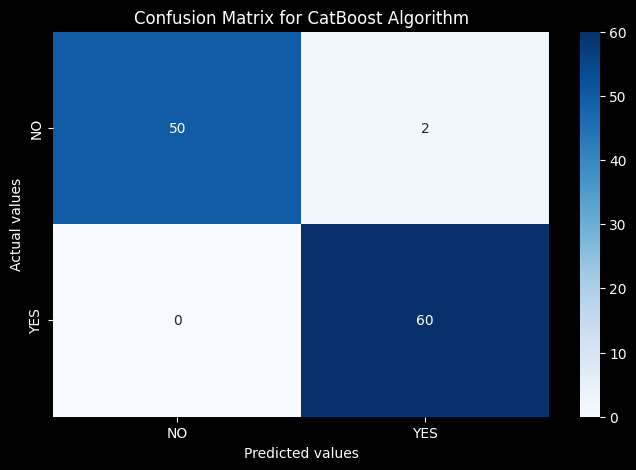

In [81]:
### Check model
CM = confusion_matrix(y_test_resampled, y_test_pred)
print('Confusion Matrix is : \n', CM)
plt.figure(figsize=(8,5))
sns.heatmap(data=CM, annot=True,fmt='g', cmap="Blues", xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title(f'Confusion Matrix for {best_model_name} Algorithm')
plt.show()

In [82]:
ClassificationReport = classification_report(y_test_resampled,y_test_pred,target_names=['NO', 'YES'])
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

          NO       1.00      0.96      0.98        52
         YES       0.97      1.00      0.98        60

    accuracy                           0.98       112
   macro avg       0.98      0.98      0.98       112
weighted avg       0.98      0.98      0.98       112



<center><span style="font-family:Palatino; font-size:22px;"><i>Like this? <span style="color:#DC143C;">Upvote and Comment!</span> </i>🌊 End</span> </center>